# Data description
Age: Describes the age of individuals. Continuous.
Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
fnlwgt: Continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: Number of years spent in education. Continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: Continuous.
capital-loss: Continuous.
hours-per-week: Continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
salary: >50K,<=50K

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
sns.set(style='white', context='notebook')

In [2]:
df=pd.read_csv("adult2.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# observation
The data has no null values.
But the data surely has many '?' values see cell 3. So we have to replace those values.

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Observation
The minimum age is 17 and maximum age is 90. Average age is 38.5 taking approx. 39.
The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
The minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [6]:
df[df=='?']=np.nan #replacing '?' with nan

In [7]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

# Observation
We can see that workclass,occupation and native country has null values. Now there are two things that we can do: 
-To remove the records with null values
-To replace the null values with mode as they are categorical
Here, it would be wise to replace the values as the total sums up to 3.7k records. 

In [9]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# Observation
We can see now there are no; null values data is now ready for prediction

# Prediction task is to determine whether a person makes over 50K a year.

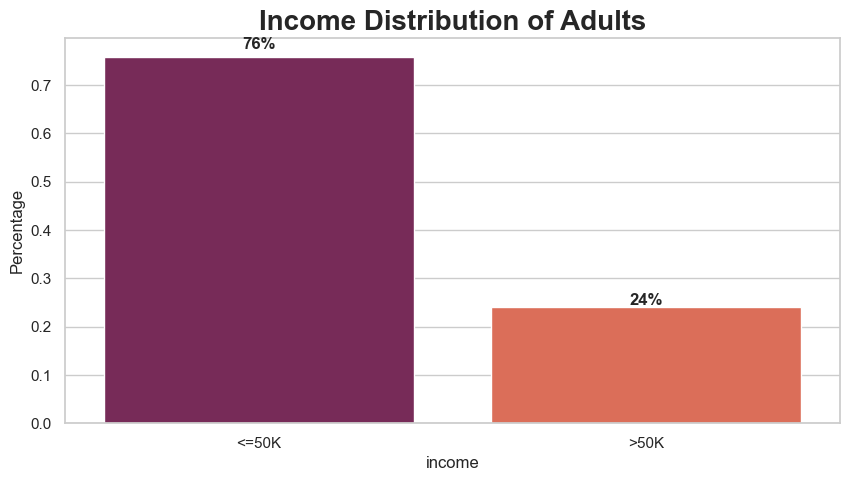

In [11]:
sns.set_style("whitegrid") #sets the background of graph
plt.figure(figsize = (10,5)) 
plt.title('Income Distribution of Adults', fontsize=20, fontweight='bold') #title of graph
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')
#this line calculates the relative frequency of each unique value in the 'income' column of df, and returns a DataFrame 
#with two columns: 'income' (the unique values) and 'Percentage' (the proportion of each unique value in the 'income' column).
#The variable eda_percentage is assigned this resulting DataFrame. 
ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(100), palette='rocket')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

# Now we will plot graphs for income vs some important features to draw conclusion

In [12]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group) #defining age groups to plot graph for every group

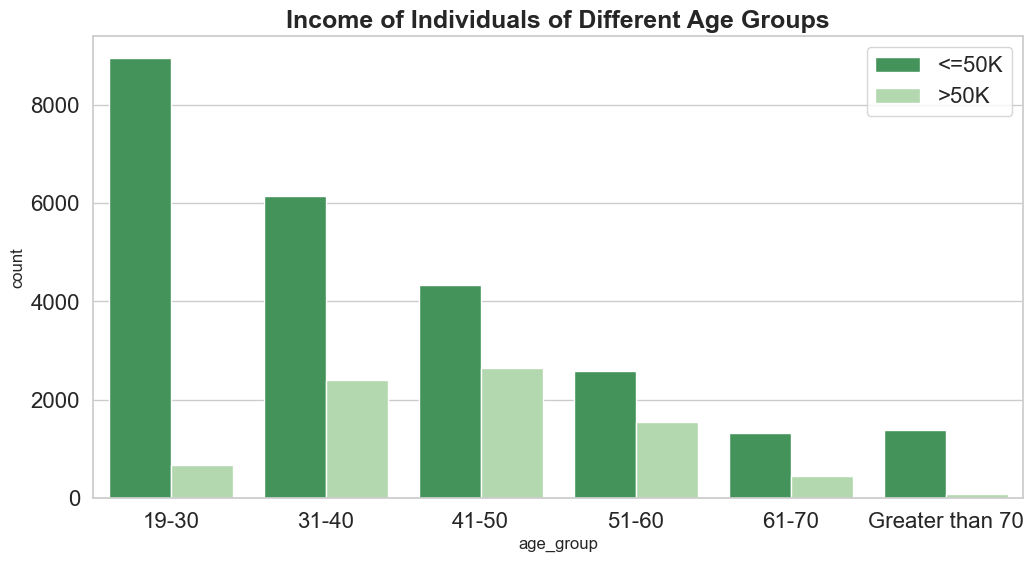

In [13]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='age_group', hue='income', data=df, palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Observation
The number of people earning >5ok increases upto age group of 41-50. Also the number of people earning >50k are comparable for age group 41-50 and 51-60.

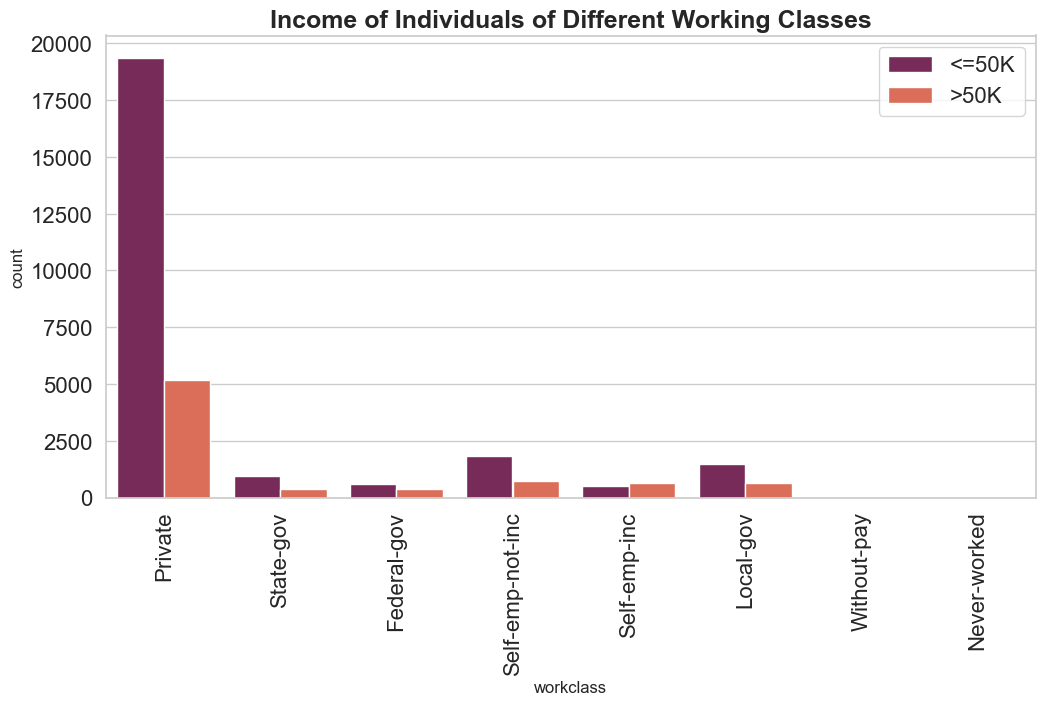

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='workclass', hue='income', data=df, palette='rocket')
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


# Observation
It is quite interesting to see that Self-Employed is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!
People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year!
There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt.
People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.

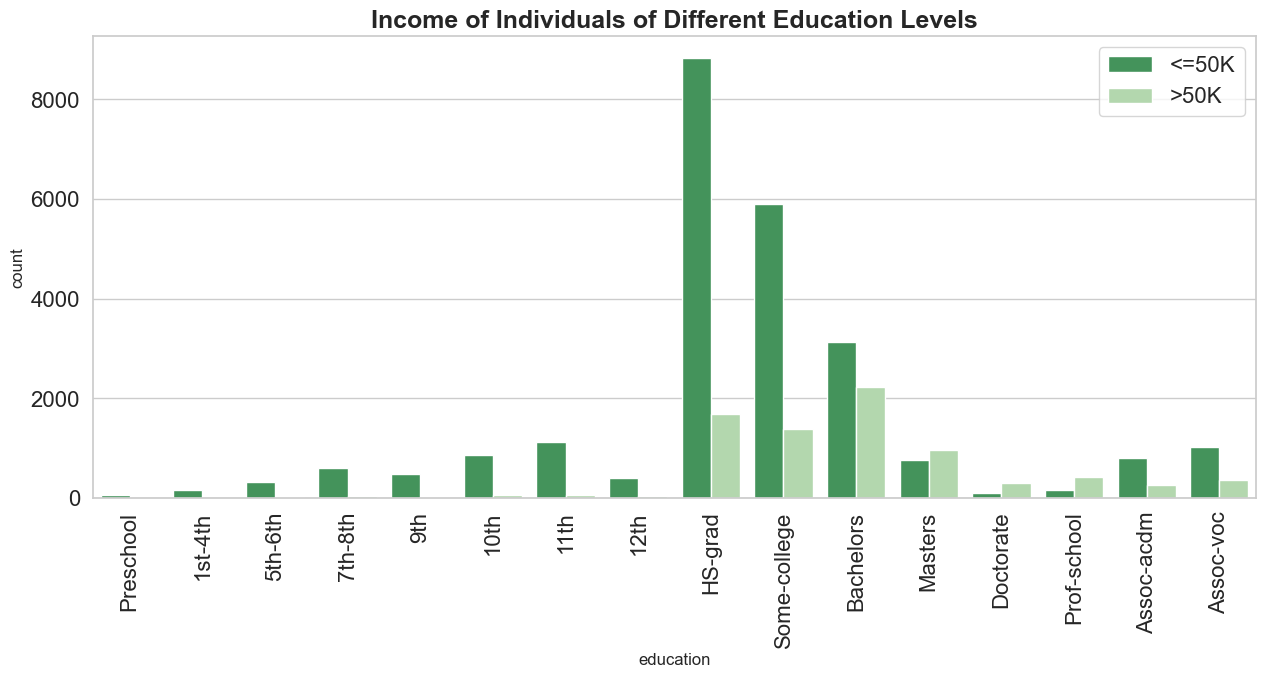

In [15]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
              'HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(x='education', hue='income', data=df, palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


# Observation
We can draw a few insightful conclusions from this graph.

For the people who have completed their education up till 12th Standard, there are just a handful of them who earn more than 50K dollars an year. Most of the people end up earning below 50K!
For the people belonging to Bachelors, Masters, Doctorate, Prof-school category in the education level, there are more number of people who are earning greater than 50K dollars an year than the number of people earning less than it.
In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

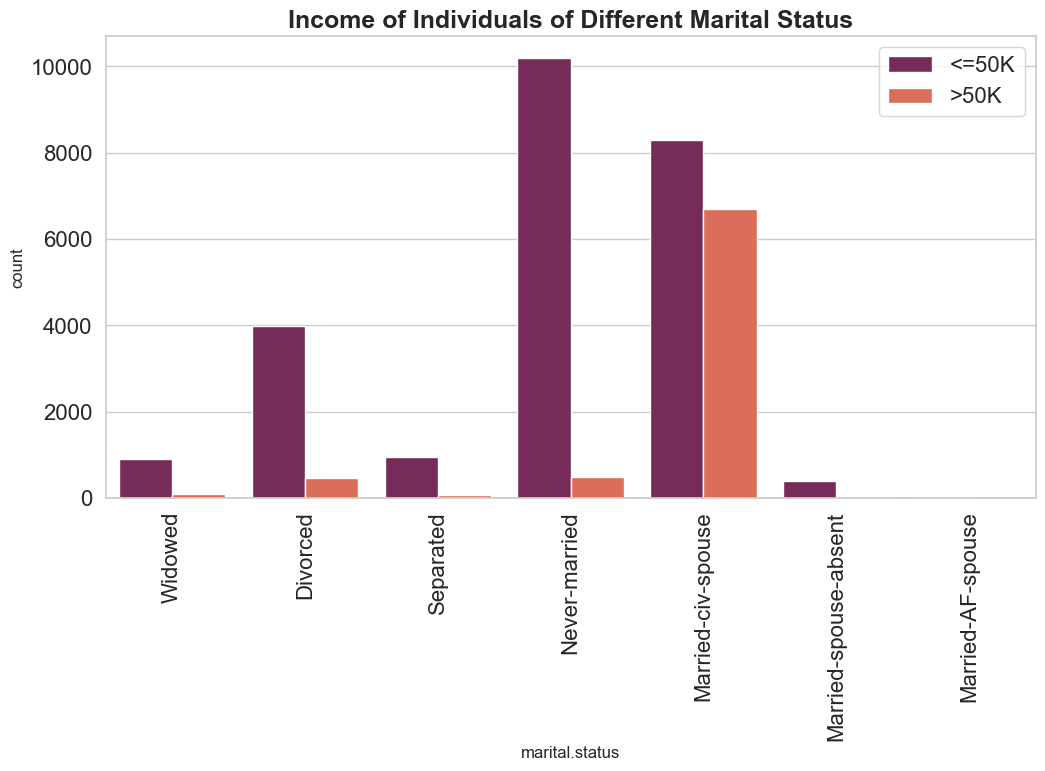

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='marital.status', hue='income', data=df, palette='rocket')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


# Observation
One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
For others, there are less than 25% of the adults earning more than 50K dollars an year.

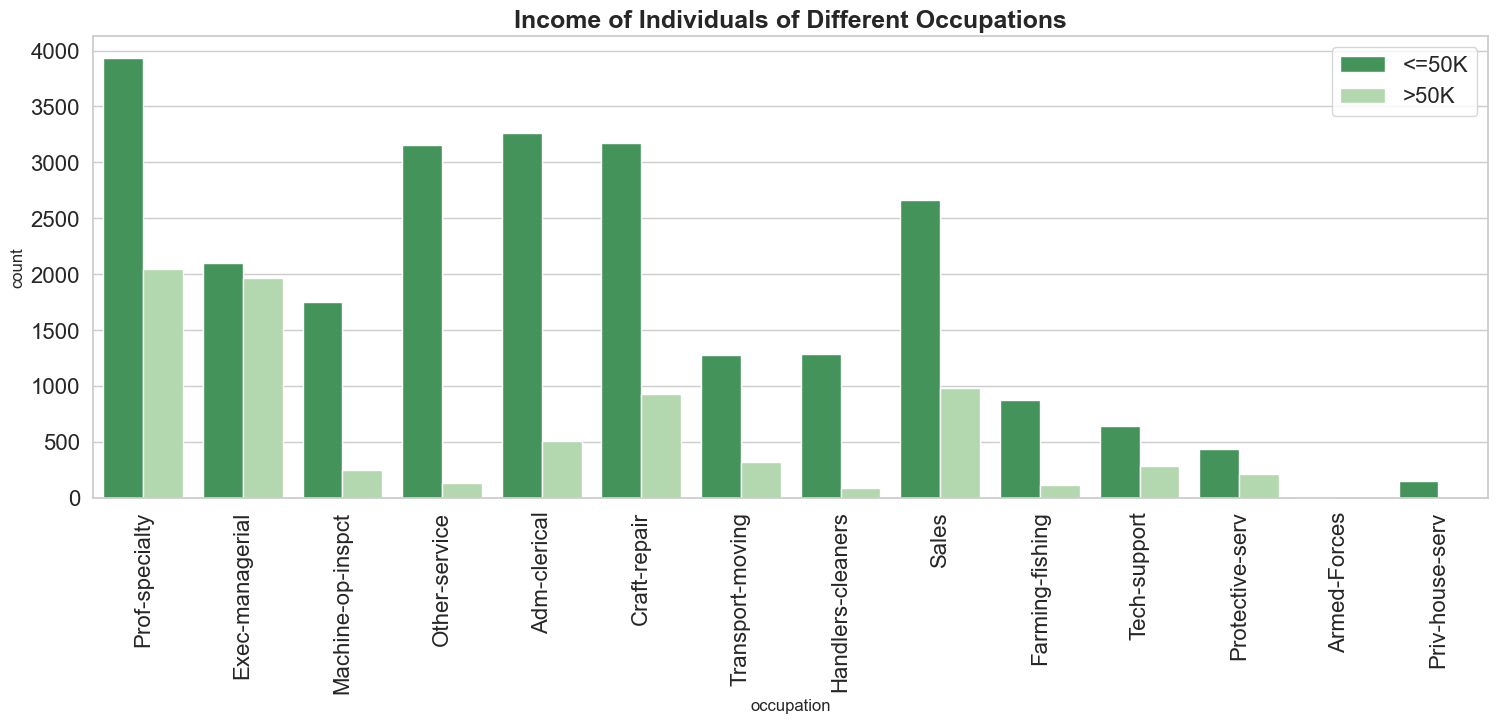

In [17]:
plt.figure(figsize=(18,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='occupation', hue ='income',data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Observation
A few points to note over here:-

Adults in Exec-managerial role are equally likely to earn more than 50K dollars an year.
There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.
Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K dollars an year.
Around 25% of the people working in Sales earn more than 50K dollars an year.

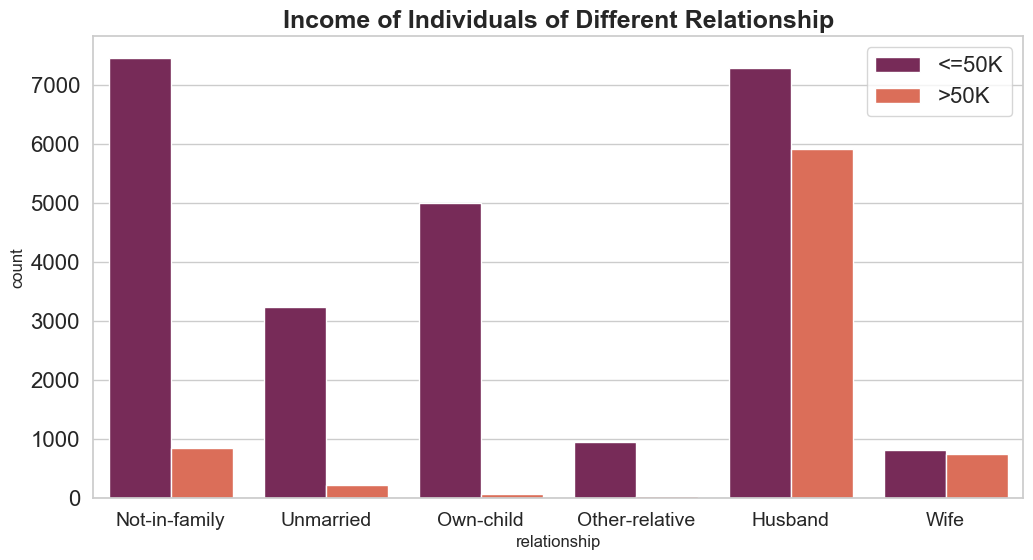

In [18]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='relationship', hue ='income',data=df, palette='rocket')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Observation
Husbands are more likely to earn more than 50K dollars an year.
For wives, although significant, there is less possibility of them to earn more than 50K dollars an year.
There are just a handful of Unmarried people and people having own child earning more than 50K dollars an year.

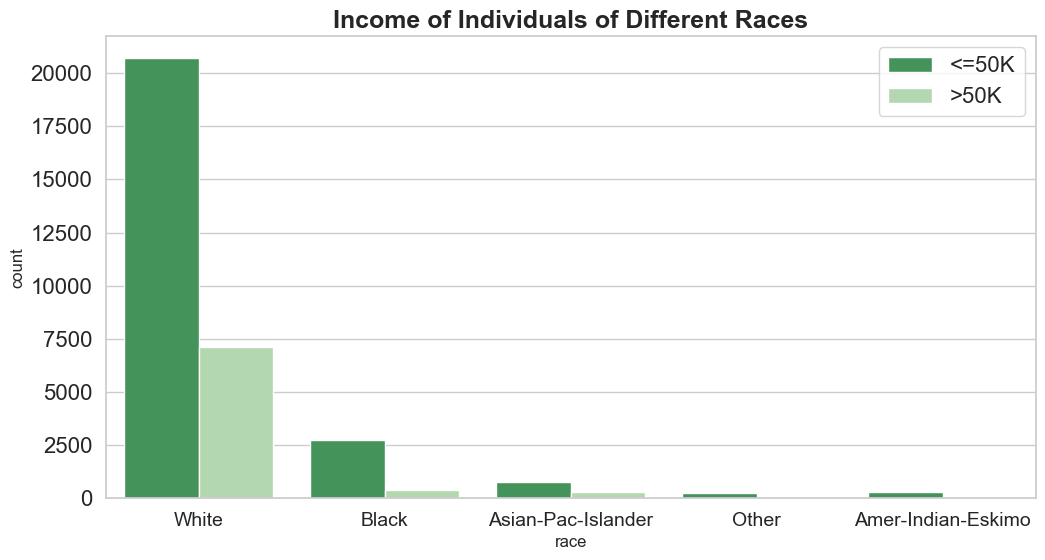

In [19]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='race', hue ='income',data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Observation
An important point to notice over here is that, except Whites there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.

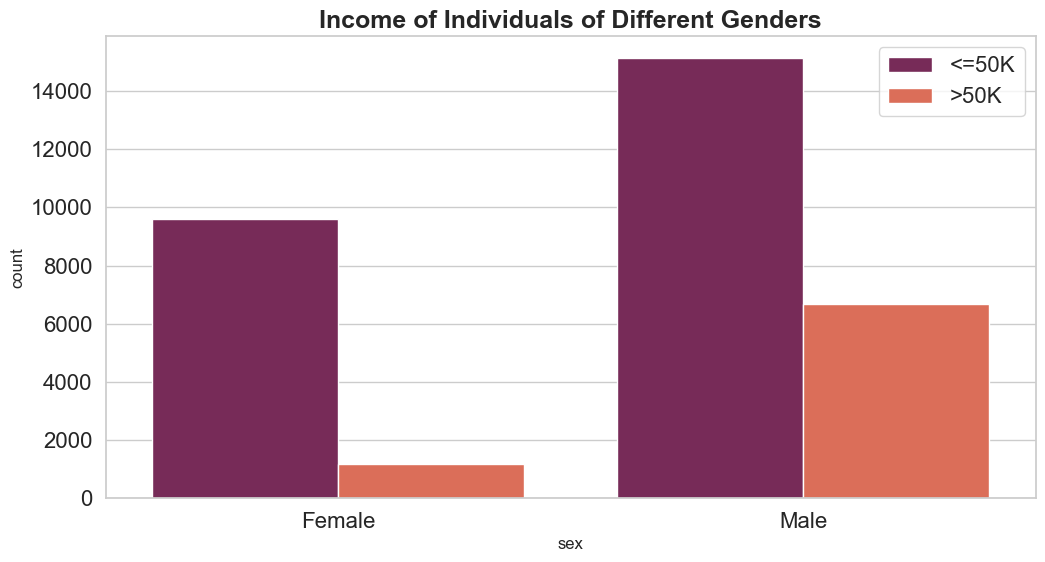

In [20]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='sex', hue ='income',data=df, palette='rocket')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Observation
For Females, there are less than 10% of the adults earning more than 50K dollars an year.
In case of Males there are close to 33% of them earning more than 50K dollars an year.

In [21]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1}) #in the 'income' column, every occurrence of '<=50K' is replaced by 0,
#and every occurrence of '>50K' is replaced by 1.

In [22]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_group
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0,Greater than 70
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,Greater than 70
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0,61-70
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,51-60
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0,19-30
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,19-30
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,31-40
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,51-60


C:\Users\ansh\AppData\Local\Temp\ipykernel_22128\2080436786.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'rocket', annot = True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


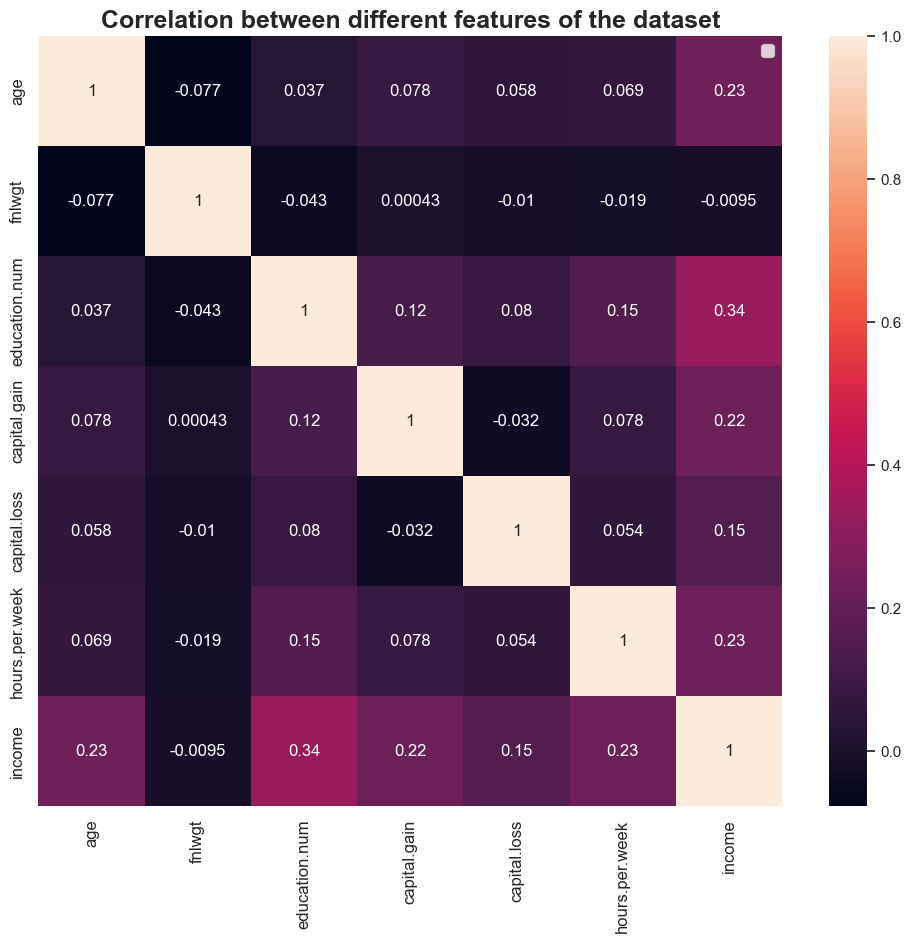

In [23]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'rocket', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

# Heat map shows the correlation between between features 1 being the highest and 0 being the lowest. Pandas profiling can also be used to find which features are highly correlated from raw data.

In [24]:
df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],'School', inplace = True)
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True) #white and other would be 
#the only two category
df.drop('fnlwgt', inplace = True, axis = 1) #removing because it is least correlated to income

In [25]:
df

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_group
0,90,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0,Greater than 70
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,Greater than 70
2,66,Private,Some-college,Widowed,Prof-specialty,Unmarried,Other,Female,0,4356,40,United-States,0,61-70
3,54,Private,School,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,51-60
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0,19-30
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,19-30
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,31-40
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,51-60


# Model implementation: Logistic regression model

In [26]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])
    
from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

# About sigmoid function
It is a mathematical function having a characteristic that can take any real value and map it to between 0 to 1 shaped like the letter “S”.
The sigmoid function also called a logistic function.
The sigmoid function g(z) takes features and weights z as an input and returns a result between 0 and 1.
The output of the sigmoid function is an actual prediction ŷ.
So, if the value of z goes to positive infinity then the predicted value of y will become 1 and if it goes to negative infinity then the predicted value of y will become 0.
And if the outcome of the sigmoid function is more than 0.5 then we classify that label as class 1 or positive class and if it is less than 0.5 then we can classify it to negative class or label as class 0

In [52]:
from scipy.special import expit as sigmoid

# About loss function
Weights is a vital part of Logistic Regression and other Machine Learning algorithms and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function.

In [53]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# About gradient descent
Gradient descent is an iterative optimization algorithm, which finds the minimum of a differentiable function. In this process, we try different values and update them to reach the optimal ones, minimizing the cost.

Lets think first step, every thing starts with initializing weights and bias. Therefore cost is dependent with them.
In order to decrease cost, we need to update weights and bias.
In other words, our model needs to learn the parameters weights and bias that minimize cost function. This technique is called gradient descent.

# Gradient descent for logistic regression
The idea is you first select any random point from the function.
Then you need to compute the derivative of J().
This will point to the direction of the local minimum.
Now multiply that resultant gradient with the Learning Rate.
The Learning Rate has no fixed value, and is to be decided based on problems.
Now, you need to subtract the result from to get the new .
This update of should be simultaneously done for every (i).
Do these steps repeatedly until you reach the local or global minimum. By reaching the global minimum, you have achieved the lowest possible loss in your prediction.

In [54]:
def gradient_descent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

# Maximum likelihood estimation
It its simplest, MLE is a method for estimating parameters.
Every time we fit a statistical or machine learning model, we are estimating parameters. A single variable linear regression has the equation:
Y = B0 + B1*X
Our goal when we fit this model is to estimate the parameters B0 and B1 given our observed values of Y and X. Maximum Likelihood Estimation is a way to estimate the parameters of a model, given what we observe.

MLE asks the question, “Given the data that we observe (our sample), what are the model parameters that maximize the likelihood of the observed data occurring?

In [55]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

# Gradient ascent
So after seeing the Cost Function and Sigmoid Function, now let’s think of an algorithm which can combine these two function and gives us the desired result.
The algorithm is the Gradient Ascent algorithm.
So Gradient Ascent is an iterative optimization algorithm for finding local maxima of a differentiable function.
The algorithm moves in the direction of gradient calculated at each and every point of the cost function curve till the stopping criteria meets.

In [56]:
def gradient_ascent(x, h, y):
    return np.dot(x.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [57]:
import time
start_time = time.time()

num_iter = 100000

intercept = np.ones((x.shape[0], 1)) 
x = np.concatenate((intercept, x), axis=1)
theta = np.zeros(x.shape[1])

for i in range(num_iter):
    h = sigmoid(np.dot(x, theta))
    gradient = gradient_descent(x, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using Gradient descent):183.58495092391968 seconds
Learning rate: 0.1
Iteration: 100000


In [34]:
result = sigmoid(np.dot(x, theta))

C:\Users\ansh\AppData\Local\Temp\ipykernel_22128\781248297.py:2: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))
C:\Users\ansh\AppData\Local\Temp\ipykernel_22128\781248297.py:2: RuntimeWarning: invalid value encountered in divide
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))


In [35]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['income']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


77.8907281717392

In [36]:
start_time = time.time()
num_iter = 100000
x2 = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age','capital.gain', 'capital.loss', 'hours.per.week']]

intercept2 = np.ones((x2.shape[0], 1))

x2 = np.concatenate((intercept2, x2), axis=1)
theta2 = np.zeros(x2.shape[1])

for i in range(num_iter):
    h2= sigmoid(np.dot(x, theta))
    gradient2 = gradient_ascent(x2, h2, y) #np.dot(X.T, (h - y)) / y.size
    theta2 = update_weight_mle(theta2, 0.1, gradient2)
    
print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + "seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

C:\Users\ansh\AppData\Local\Temp\ipykernel_22128\781248297.py:2: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))
C:\Users\ansh\AppData\Local\Temp\ipykernel_22128\781248297.py:2: RuntimeWarning: invalid value encountered in divide
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))


Training time (Log Reg using MLE):310.82505440711975seconds
Learning rate: 0.1
Iteration: 100000


In [38]:
result2 = sigmoid(np.dot(x2, theta2))
print("Accuracy (Maximum Likelihood Estimation):")
f2 = pd.DataFrame(result2).join(y)
f2.loc[f2[0]==f2['income']].shape[0] / f2.shape[0] * 100

Accuracy (Maximum Likelihood Estimation):


C:\Users\ansh\AppData\Local\Temp\ipykernel_22128\781248297.py:2: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))
C:\Users\ansh\AppData\Local\Temp\ipykernel_22128\781248297.py:2: RuntimeWarning: invalid value encountered in divide
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))


22.109271828260805

In [45]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [46]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, Y_pred)
print("Logistic Regression",acc)

Logistic Regression 0.802972607787741


In [49]:
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = i)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.8048151332760103
2 0.8024812676575359
3 0.8081316791548949
4 0.798182041518241
5 0.8071489988944847
6 0.8017442574622282
7 0.8043237931458052
8 0.8044466281783564
9 0.8078860090897924
10 0.8065348237317282
11 0.8066576587642795
12 0.8114482250337797
13 0.8060434836015231
14 0.8050608033411129
15 0.8027269377226385
16 0.8008844122343692
17 0.8040781230807026
18 0.8118167301314335
19 0.7984277115833436
20 0.8067804937968308
21 0.8100970396757156
22 0.7987962166809974
23 0.8014985873971257
24 0.805552143471318


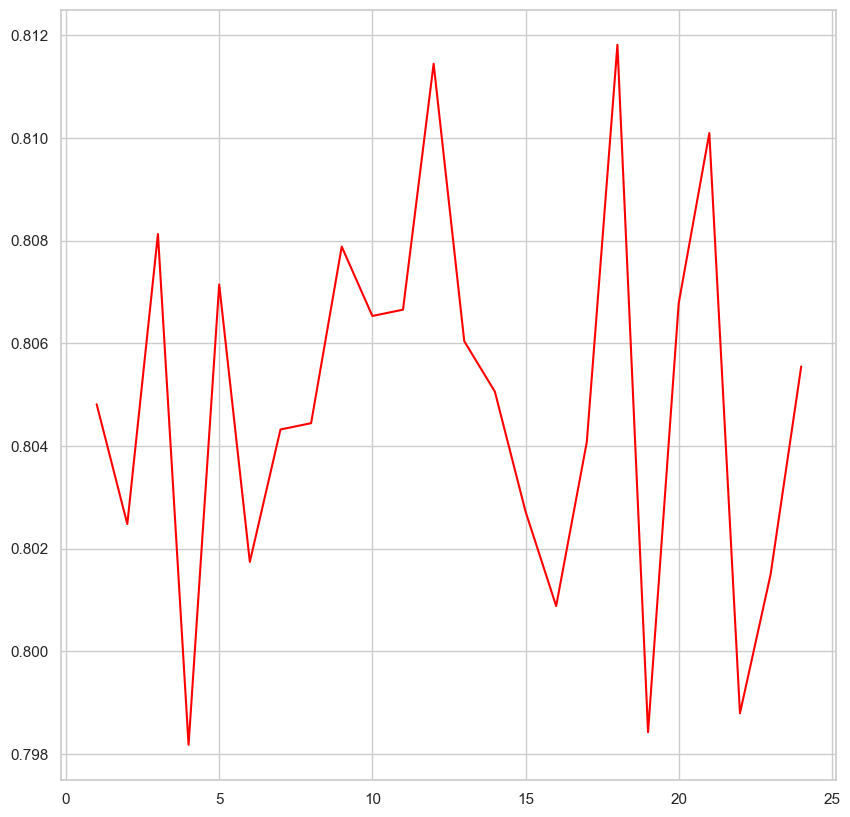

In [50]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs)):
    print(rs[i],acc[i])

In [51]:
for i in range(0,24):
    if acc[i] > 0.808:
        print(acc[i])

0.8081316791548949
0.8114482250337797
0.8118167301314335
0.8100970396757156


# conclusion
We see that the Logistic Regression using Sklearn gives us a maximum accuracy of 81.18 %. Thinking about this, the model that we prepared from scratch was not so bad as compared to the inbuilt one!